In [1]:
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt

`VGG` - bu Karen Simonyan va Endryu Zisserman tomonidan taklif qilingan chuqur konvolyutsion neyron tarmoq hisoblanadi. VGG - bu Oksford universitetidagi guruh nomi,  "Visual geometriya guruhining" qisqartmasi. Ushbu model ILSVRC-2014 tanlovida 92,7% tasniflash ko'rsatkichga erishgan va 2-o'rinni egllagan. VGG modeli katta hajmdagi tasvirlar bilan ishlash uchun juda kichik konvolyutsion filtr o'lchamiga (3 × 3) ega bo'lgan qatlamlar chuqurligini o'rganadi. 

VGG ning VGG16 va VGG19 versiyalari mavjud

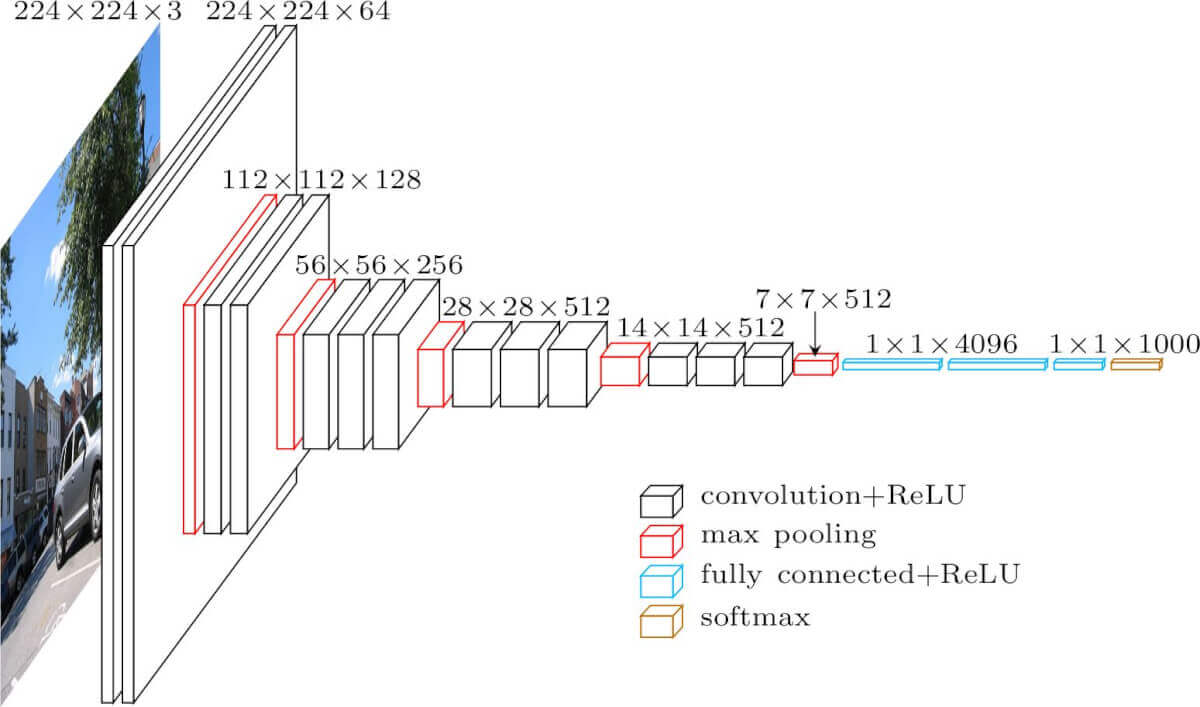

# VGG16
VGG16 modeli ImageNet datasetida o'qitilgan bo'lib chiqishda 1000 ta obyektni bashorat qila oladi.

Modeldagi parametrlar soni 138.4 milion tani tashkil etadi.

Chuqurligi 16 ga teng shuning uchun ham vgg16 nomini olgan

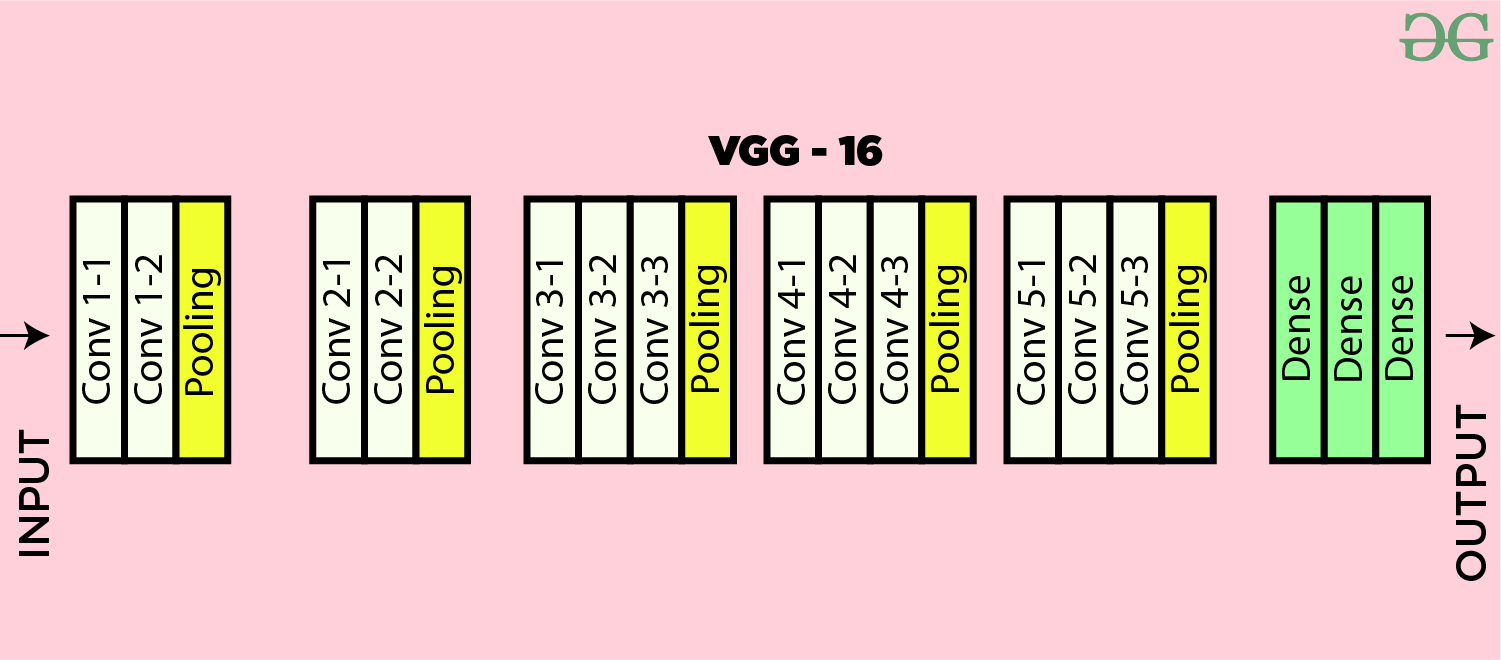

VGG16 AlexNetning takomillashtirilgan versiyasi bo'lib, katta filtrlarni (birinchi va ikkinchi konvolyutsion qatlamlarda mos ravishda 11 va 5 o'lchamli) birin-ketin bir nechta 3x3 filtrlar bilan almashtiradi. VGG16 tarmog'i NVIDIA TITAN BLACK grafik kartalari yordamida bir necha hafta davomida o'qitilgan.

`Bu esa bizga modelni oddiyroq qilib aytadigan bo'lsak 138.4 million parametrlarni boshidan o'qitmasdan ishlatish va bashorat qilish imkonini beradi `

In [2]:
model_vgg16 = VGG16()
# modelni oqib oldik

In [3]:
model_vgg16.summary()
# Total params(Umumiy parametrlar soni) hamda Trainable params(train bo'lgan parametrlar soni) = 138,357,544

Model: "vgg16"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         

                                                                 

 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      

                                                                 

 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     

                                                                 

 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         

                                                                 

 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     

                                                                 

 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    

                                                                 

 block2_pool (MaxPooling2D)  (None, 56, 56, 1

In [4]:
model_vgg16.layers
# vgg16 ning layerlarini korishimiz mumkin
# Vgg16 birinchi 2 ta Convolution qatlamda 64 ta filt qollaydi

In [5]:
model_vgg16.layers[0].input
# modelga biz 224x224x3 o'lchovli rasmni berishimiz kerak

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [6]:
model_vgg16.layers[0].output

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [7]:
model_vgg16.layers[1].activation
# 1-layerdagi ReLu acivatsiya funksiyasidan foydalanamiz

<function keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)>

In [8]:
model_vgg16.layers[1].get_weights()
# 1-layerning weightlari

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [9]:
model_vgg16.layers[1].filters
# 1-layerda 64 ta har xil random filtrlar qo'laniladi. Maslan Sobel x, Sobel y va boshqalar
# bu orqali biz orasmlarni kerakli qirralarni topib olishimiz  mumkin bo'ladi

64

In [10]:
model_vgg16.layers[1].kernel_size
# kernel yani filtrning o'lchami

(3, 3)

In [11]:
model_vgg16.layers[1].padding
# padding=same bu biz rasmga filtr qollashdan oldin ung atrofini nollar bilan to'ldirib olishimiznin anglatadi
# shunday qilsak biznig rasmimiz olchamini yoqotmaydi

'same'

# VGG19

VGG19 modeli ham ImageNet datasetida o'qitilgan bo'lib chiqishda 1000 ta obyektni bashorat qila oladi.

Modeldagi parametrlar soni 143.7 milion tani tashkil etadi.

Chuqurligi 19 ga teng shuning uchun ham vgg19 nomini olgan

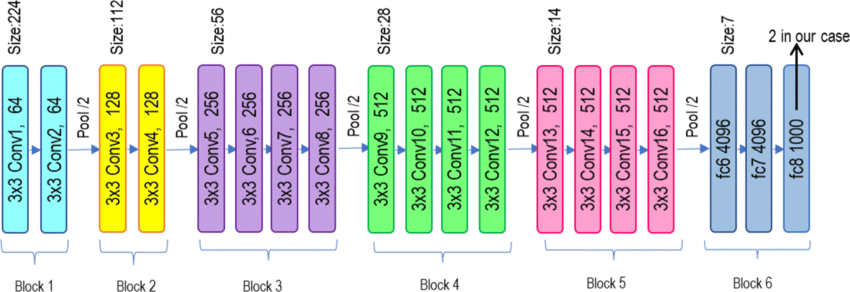

VGG16 va VGG19 ning asosiy farqi bu qatlamlar sonida

In [12]:
model_vgg19 = VGG19()
# modelni o'qib oldik

In [14]:
model_vgg19.summary()
# Total params(Umumiy parametrlar soni) hamda Trainable params(train bo'lgan parametrlar soni) = 143,667,240
# VGG16 dan 5,309,696 ko'proq

Model: "vgg19"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         

                                                                 

 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      

                                                                 

 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     

                                                                 

 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         

                                                                 

 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     

                                                                 

 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    

                                                                 

 block2_pool (MaxPooling2D)  (None, 56, 56, 1

In [15]:
model_vgg19.layers
# vgg19 ning layerlarini ko'rishimiz mumkin

In [16]:
model_vgg19.layers[0].input
# modelga biz 224x224x3 o'lchovli rasmni berishimiz kerak

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [17]:
model_vgg19.layers[1].activation
# 1-layerdagi ReLu acivatsiya funksiyasidan foydalanamiz

<function keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)>

In [18]:
model_vgg19.layers[1].get_weights()
# 1-layerning weightlari

[array([[[[ 0.34119523,  0.09563112,  0.0177449 , ..., -0.11436455,
           -0.05099866, -0.00299793],
          [ 0.46418372,  0.03355668,  0.10245045, ..., -0.06945956,
           -0.04020201,  0.04048637],
          [ 0.39416704, -0.08419707, -0.03631314, ..., -0.10720515,
           -0.03804016,  0.04690642]],
 
         [[ 0.33999205,  0.13363543,  0.02129423, ..., -0.13025227,
           -0.16508926, -0.06969624],
          [ 0.41810837,  0.05260524,  0.09755926, ..., -0.09385028,
           -0.20492788, -0.0573062 ],
          [ 0.37740308, -0.07876257, -0.04775979, ..., -0.11827433,
           -0.19008617, -0.01889699]],
 
         [[-0.04484424,  0.06471398, -0.07631404, ..., -0.12629718,
           -0.29905206, -0.2825364 ],
          [-0.04806903, -0.00658076, -0.02234544, ..., -0.0878844 ,
           -0.3915486 , -0.34632796],
          [-0.04594866, -0.11583115, -0.14462094, ..., -0.12290562,
           -0.35782176, -0.27979308]]],
 
 
        [[[ 0.23215917,  0.133657 

In [19]:
model_vgg19.layers[10].filters
# 10-layerda 256 ta har xil random filtrlar qo'laniladi. Maslan Sobel x, Sobel y va boshqalar
# bu orqali biz rasmlarni kerakli qirralarni topib olishimiz  mumkin bo'ladi


256

In [20]:
model_vgg19.layers[1].kernel_size
# kernel yani filtrning o'lchami

(3, 3)

In [21]:
model_vgg19.layers[1].padding
# padding=same bu biz rasmga filtr qollashdan oldin ung atrofini nollar bilan to'ldirib olishimiznin anglatadi
# shunday qilsak biznig rasmimiz olchamini yoqotmaydi

'same'

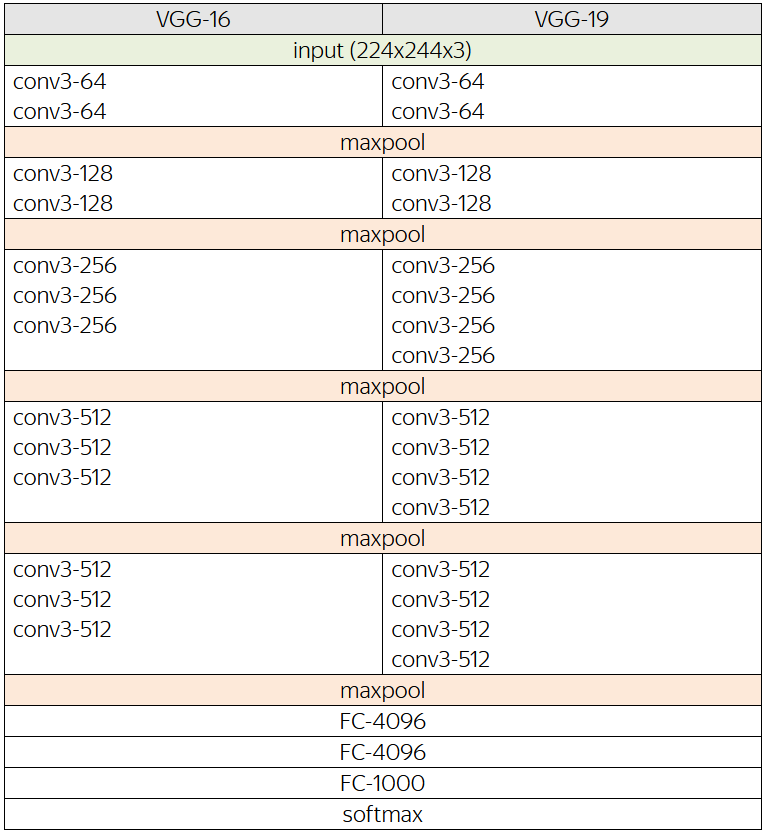

# Inceptionv3 (GoogLeNet)

Inceptionv3 - bu 50 ta asosiy qatlam konvolyutsion neyron tarmoq. U Googleda kompaniyasi tomonidan yaratilgan va o'qitilgan. Inceptionv3 ham VGG16 va VGG19 kabi ImageNet datasetida o'qitilgan va 100 ta obyektni bashorat qila oladi.
Tepada aytib o'tilganidek ILSVRC-2014 tanlovida VGG 2-o'rinni egallagan bolsa Inceptionv3 1-o'rinni egallagan.
VGG dan farqli Inceptionv3 kirishida 229x229x3 o'lchovli rasm qabul qiladi.

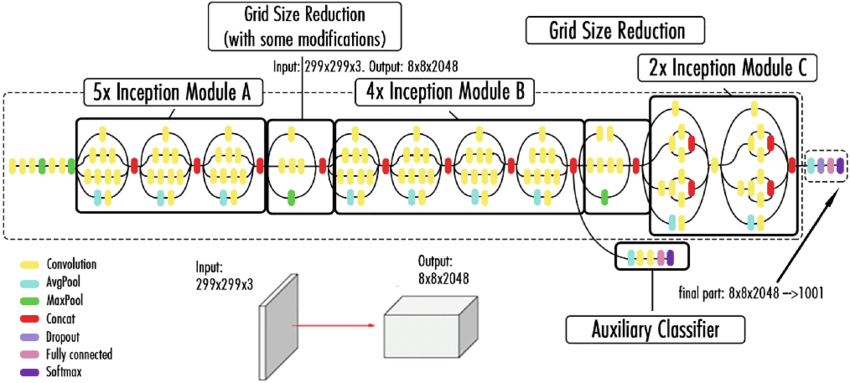

Inceptionv3 VGG modellariga qaraganda ancha kam parametrga ega yani 23.9 million lekin ulardan yaxshi bashorat qiladi

In [22]:
model_inc3 = InceptionV3()
# modelni oqib oldik

In [23]:
model_inc3.summary()
# Total params(Umumiy parametrlar soni) = 23,851,784
# Trainable params(train bo'lgan parametrlar soni) = 23,817,352
# Non-trainable params(train bolishi kerak bolgan parametrlar soni) = 34,432

Model: "inception_v3"

__________________________________________________________________________________________________

 Layer (type)                   Output Shape         Param #     Connected to                     


 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               

                                )]                                                                

                                                                                                  

 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_3[0][0]']                

                                )                                                                 

                                                                                                  

 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 

 alization)                     )                                           

In [24]:
model_inc3.layers
# etibor bersak InceptionV3 ning VGG dan farqli chihatidan bittasi bu
# unda BatchNormalization ishlatilgan. 
#  Batch normalization train jarayonida qollaniladi, 
# bu jarayon har bir kiruvchi rasmni ortacha qiymatini va staddart og'ishini topish orqali standartizatsiya qilinadi 


In [25]:
model_inc3.layers[0].input
# modelga biz 229x229x3 o'lchovli rasmni berishimiz kerak

<KerasTensor: shape=(None, 299, 299, 3) dtype=float32 (created by layer 'input_3')>

In [26]:
model_inc3.layers[1].activation
# 1-layerdagi linear activatsiya funksiyasidan foydalanamiz

<function keras.activations.linear(x)>

In [27]:
model_inc3.layers[1].get_weights()
# 1-layerning weightlari

[array([[[[-4.59105551e-01, -4.14526574e-02, -3.62577499e-03,
           -9.87672508e-02, -3.37070860e-02,  4.79929037e-02,
            2.32542142e-01,  3.23927671e-01,  5.90160079e-02,
            9.47738215e-02,  4.24996056e-02,  1.26620471e-01,
            1.33215979e-01,  1.22741833e-01, -7.92686343e-02,
            2.08227970e-02, -1.99647829e-01, -3.02687973e-01,
           -2.10659921e-01, -3.52898419e-01, -5.58023095e-01,
            3.20223093e-01,  4.53596050e-03, -3.09266411e-02,
           -6.86957911e-02,  2.00968519e-01,  1.14542745e-01,
            2.40372881e-01,  1.52943470e-02,  5.96231259e-02,
           -5.85714653e-02,  8.78173351e-01],
          [ 3.16376328e-01, -4.78494260e-03, -6.84681814e-03,
            7.44503662e-02, -1.97458476e-01,  5.20143658e-02,
           -1.24460436e-01,  3.36123914e-01,  3.01678218e-02,
           -1.26477107e-01, -1.05597451e-01, -5.31241074e-02,
           -2.43102223e-01,  1.66047230e-01, -1.03186309e-01,
           -6.55613691e-

In [28]:
model_inc3.layers[1].filters
# 1-layerda 32 ta har xil random filtrlar qo'laniladi. Maslan Sobel x, Sobel y va boshqalar
# bu orqali biz orasmlarni kerakli qirralarni topib olishimiz  mumkin bo'ladi

32

In [29]:
model_inc3.layers[1].kernel_size
# kernel yani filtrning o'lchami

(3, 3)

In [30]:
model_inc3.layers[1].padding
# padding=valid bu biz rasmga filtr qollashdan oldin uning atrofini hechqanday sonlar bilan toldirilmasligini anglatadi
# masalan 6x6 rasm ga 3x3 filtr qollanganda 4x4 rasm bo'ladi

'valid'

Endi VGG16, VGG19 va InceptionV3 modellarida erkak va ayolni ajratadigan model qurib qaysi bir aniqroq ishalshini ko'rib chiqamiz


In [2]:
model_vgg16 = VGG16(include_top=False, input_shape=(224,224,3))
model_vgg19 = VGG19(include_top=False, input_shape=(224,224,3))
model_inc3 = InceptionV3(include_top=False, input_shape=(229,229,3))
# biz faqat Convatution qismni olamiz va Dense qismida 2 ta class uchun bashorat qilamiz
# agar modelni hammasini olsak u 1000 ta obyekti bashorat qilish uchun bo'lib qoladi

In [3]:
for i in range(len(model_vgg16.layers)):
    model_vgg16.layers[i].trainable=False

In [4]:
for i in range(len(model_vgg19.layers)):
    model_vgg19.layers[i].trainable=False

In [5]:
for i in range(len(model_inc3.layers)):
    model_inc3.layers[i].trainable=False

In [6]:
new_model_vgg16 = Sequential([
    model_vgg16,
    Flatten(),
    Dense(100,activation="relu"),
    Dense(2,activation="softmax")
])


In [7]:
new_model_vgg16.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 vgg16 (Functional)          (None, 7, 7, 512)         14714688  

                                                                 

 flatten (Flatten)           (None, 25088)             0         

                                                                 

 dense (Dense)               (None, 100)               2508900   

                                                                 

 dense_1 (Dense)             (None, 2)                 202       

                                                                 


Total params: 17,223,790

Trainable params: 2,509,102

Non-trainable params: 14,714,688

_________________________________________________________________


In [8]:
new_model_vgg19 = Sequential([
    model_vgg19,
    Flatten(),
    Dense(100,activation="relu"),
    Dense(2,activation="softmax")
])


In [9]:
new_model_vgg19.summary()

Model: "sequential_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 vgg19 (Functional)          (None, 7, 7, 512)         20024384  

                                                                 

 flatten_1 (Flatten)         (None, 25088)             0         

                                                                 

 dense_2 (Dense)             (None, 100)               2508900   

                                                                 

 dense_3 (Dense)             (None, 2)                 202       

                                                                 


Total params: 22,533,486

Trainable params: 2,509,102

Non-trainable params: 20,024,384

_________________________________________________________________


In [10]:
new_model_inc3 = Sequential([
    model_inc3,
    Flatten(),
    Dense(100,activation="relu"),
    Dense(2,activation="softmax")
])


In [11]:
new_model_inc3.summary()

Model: "sequential_2"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  

                                                                 

 flatten_2 (Flatten)         (None, 51200)             0         

                                                                 

 dense_4 (Dense)             (None, 100)               5120100   

                                                                 

 dense_5 (Dense)             (None, 2)                 202       

                                                                 


Total params: 26,923,086

Trainable params: 5,120,302

Non-trainable params: 21,802,784

_________________________________________________________________


In [ ]:
# VGG uchun trainva test datalar tuzib olamiz
# InceptionV3 uchun esa rasmlarni olchami 229x229 bolis kerak

In [12]:
train_data = image_dataset_from_directory("Datasets/gender/train",
                                         image_size=(224,224), 
                                         label_mode="categorical", 
                                         validation_split=0.8,
                                         subset="training",
                                         seed=42)

Found 1876 files belonging to 2 classes.

Using 376 files for training.


In [13]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [14]:
train_data.class_names

['man', 'woman']

In [15]:
test_data = image_dataset_from_directory("Datasets/gender/test",
                                         image_size=(224,224),
                                         label_mode="categorical",
                                         validation_split=0.2,
                                         subset="validation",
                                         seed=42)

Found 470 files belonging to 2 classes.

Using 94 files for validation.


In [16]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [17]:
test_data.class_names

['man', 'woman']

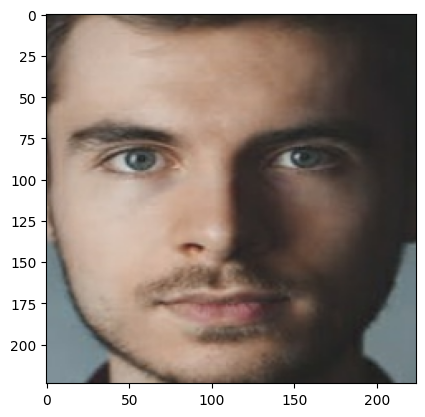

In [18]:
plt.imshow(list(train_data)[0][0][0].numpy().astype(np.uint8))

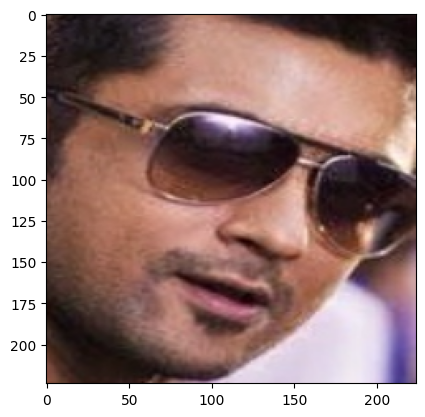

In [19]:
plt.imshow(list(test_data)[0][0][0].numpy().astype(np.uint8))

In [ ]:
# InceptionV3 train va test yaratib olamiz

In [20]:
train_data2 = image_dataset_from_directory("Datasets/gender/train",
                                         image_size=(229,229), 
                                         label_mode="categorical", 
                                         validation_split=0.8,
                                         subset="training",
                                         seed=42)

Found 1876 files belonging to 2 classes.

Using 376 files for training.


In [21]:
train_data2

<BatchDataset element_spec=(TensorSpec(shape=(None, 229, 229, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [22]:
train_data2.class_names

['man', 'woman']

In [23]:
test_data2 = image_dataset_from_directory("Datasets/gender/test",
                                         image_size=(229,229),
                                         label_mode="categorical",
                                         validation_split=0.2,
                                         subset="validation",
                                         seed=42)

Found 470 files belonging to 2 classes.

Using 94 files for validation.


In [24]:
test_data2

<BatchDataset element_spec=(TensorSpec(shape=(None, 229, 229, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [25]:
test_data2.class_names

['man', 'woman']

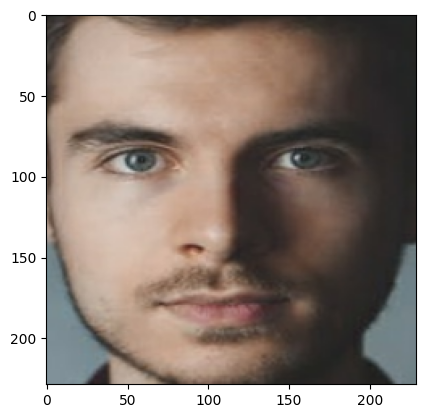

In [26]:
plt.imshow(list(train_data2)[0][0][0].numpy().astype(np.uint8))

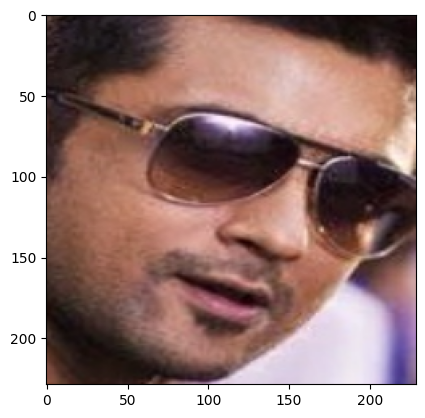

In [27]:
plt.imshow(list(test_data2)[0][0][0].numpy().astype(np.uint8))

In [28]:
new_model_vgg16.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")
new_model_vgg19.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")
new_model_inc3.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

In [29]:
with tf.device("/GPU:0"):
    new_model_vgg16.fit(train_data, epochs=5)

Epoch 1/5

12/12 [==============================] - 21s 760ms/step - loss: 9.9856 - accuracy: 0.7979

Epoch 2/5

12/12 [==============================] - 3s 244ms/step - loss: 0.3816 - accuracy: 0.9734

Epoch 3/5

12/12 [==============================] - 3s 242ms/step - loss: 0.1400 - accuracy: 0.9840

Epoch 4/5

12/12 [==============================] - 3s 244ms/step - loss: 0.0798 - accuracy: 0.9867

Epoch 5/5

12/12 [==============================] - 3s 242ms/step - loss: 0.0061 - accuracy: 0.9973


In [30]:
with tf.device("/GPU:0"):
    new_model_vgg19.fit(train_data, epochs=5)

Epoch 1/5

12/12 [==============================] - 5s 294ms/step - loss: 10.1659 - accuracy: 0.7287

Epoch 2/5

12/12 [==============================] - 4s 295ms/step - loss: 0.8399 - accuracy: 0.9335

Epoch 3/5

12/12 [==============================] - 4s 295ms/step - loss: 0.3992 - accuracy: 0.9601

Epoch 4/5

12/12 [==============================] - 4s 295ms/step - loss: 0.0328 - accuracy: 0.9894

Epoch 5/5

12/12 [==============================] - 4s 295ms/step - loss: 0.0075 - accuracy: 0.9973


In [31]:
with tf.device("/GPU:0"):
    new_model_inc3.fit(train_data2, epochs=5)

Epoch 1/5

12/12 [==============================] - 9s 267ms/step - loss: 222.3301 - accuracy: 0.5080

Epoch 2/5

12/12 [==============================] - 2s 122ms/step - loss: 2.4341 - accuracy: 0.5213

Epoch 3/5

12/12 [==============================] - 2s 122ms/step - loss: 0.6857 - accuracy: 0.5106

Epoch 4/5

12/12 [==============================] - 2s 123ms/step - loss: 0.6857 - accuracy: 0.5106

Epoch 5/5

12/12 [==============================] - 2s 123ms/step - loss: 0.6857 - accuracy: 0.5106


In [32]:
new_model_vgg16.evaluate(test_data)

3/3 [==============================] - 8s 4s/step - loss: 3.4544 - accuracy: 0.8936


[3.454371690750122, 0.8936170339584351]

In [33]:
new_model_vgg19.evaluate(test_data)

3/3 [==============================] - 1s 283ms/step - loss: 0.9453 - accuracy: 0.9043


[0.9452683329582214, 0.9042553305625916]

In [34]:
new_model_inc3.evaluate(test_data2)

3/3 [==============================] - 4s 974ms/step - loss: 0.6930 - accuracy: 0.5426


[0.6929666996002197, 0.542553186416626]

### VGG16, VGG19 va Inceptionv3 (GoogLeNet) gender dataseti ishlatganimzda VGG modellarimiz yaxshiroq ishladi.
### Xulosa har xil muammoni, har xil tasniflash uchun alohida modellar kerak chunki hamma obyektlar uchun optimal model yoq biz muammoga qarab model tanlab ishlatishimiz kerak

### Tepadagi misolda ko'rganimizdek Inceptionv3 (GoogLeNet) modeli ILSVRC-2014 tanlovida VGG dan ustun kelgan bo'lsa ham, odamlarni ajratishda VGG ustun keldi